The purpose of this notebook is to utilize TF-IDF vectorization in topic modeling, using the new_df dataframe built in final_dataframe_cleanup.ipynb.

Importing packages:

In [1]:
import nltk
from nltk.corpus import stopwords
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 20,10

Picking in Data:

In [2]:
with open('Data/cleaned_string_df.pickle','rb') as read_file:
    new_df = pickle.load(read_file)

In [3]:
new_df.head()

,Debate_Name,Transcript,Speaker,Data_Source,Debate_Type,Year,Speaker_Type,line_length,Election_Result,string
0,The First Clinton-Bush-Perot Presidential Deb...,"LEHRER: Good evening, and welcome to the first...",lehrer,Commission for Presidential Debates,General-President,1992,Moderator/Other,100,n/a,good evening welcome first debate among major ...
1,The First Clinton-Bush-Perot Presidential Deb...,PEROT: I think the principal that separates me...,perot,Commission for Presidential Debates,General-President,1992,Independent,74,Loser,think principal separate half million people c...
2,The First Clinton-Bush-Perot Presidential Deb...,"LEHRER: Governor Clinton, a one minute response.",lehrer,Commission for Presidential Debates,General-President,1992,Moderator/Other,3,n/a,one minute response
3,The First Clinton-Bush-Perot Presidential Deb...,CLINTON: The most important distinction in thi...,clinton,Commission for Presidential Debates,General-President,1992,Democrat,45,Winner,important distinction campaign represent real ...
4,The First Clinton-Bush-Perot Presidential Deb...,"LEHRER: President Bush, one minute response, sir.",lehrer,Commission for Presidential Debates,General-President,1992,Moderator/Other,4,n/a,one minute response sir


# TF-IDF Vectorizer

For the next round of topic modeling, I will be using TF-IDF vectorizer, to compare the results.

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [5]:
stop = ['presidential', 'vice', 'evening', 'debate', 'candidate', 'campaign', 'minute']

In [6]:
vectorizer = TfidfVectorizer(stop_words=stop)

Note, more stop words were implemented in final_dataframe_cleanup.ipynb.

Since some responses can be very short (i.e. just a brief statement/quip), I am setting a minimum threshold of words for topic modelling.

In [7]:
X = new_df[new_df.line_length >= 30]['string']
tfi_model = vectorizer.fit_transform(X)

In [8]:
tf_term_document_matrix = pd.DataFrame(tfi_model.toarray(), columns=vectorizer.get_feature_names())

In [9]:
tf_term_document_matrix.shape

(10278, 15947)

## Topic Modelling

After getthe the document set in terms of TF-IDF vectorization, below will try Topic Modelling using a few different tools.

### Topic Modelling via NMF:

In [10]:
nmf_model = NMF(5)

Topics from the relating model, for each line:

In [11]:
tf_doc_topic = nmf_model.fit_transform(tf_term_document_matrix)
tf_doc_topic.shape

/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


(10278, 5)

Pulling the top 10 words for each of the k topics:

In [12]:
tf_words = vectorizer.get_feature_names()
tf = nmf_model.components_.argsort(axis=1)[:,-15:]
tf_topic_words = [[tf_words[e] for e in l] for l in tf]
for i, words in enumerate(tf_topic_words, 1):
    print('Topic {}:'.format(i))
    print(words)
    print('\n')

Topic 1:
['thing', 'think', 'back', 'million', 'america', 'economy', 'need', 'know', 'work', 'got', 'make', 'job', 'get', 'people', 'going']


Topic 2:
['raise', 'code', 'money', 'increase', 'social', 'middle', 'billion', 'budget', 'rate', 'pay', 'plan', 'income', 'percent', 'cut', 'tax']


Topic 3:
['million', 'doctor', 'get', 'drug', 'universal', 'people', 'affordable', 'company', 'system', 'medicare', 'cost', 'plan', 'insurance', 'care', 'health']


Topic 4:
['iraq', 'first', 'issue', 'believe', 'time', 'military', 'say', 'world', 'right', 'one', 'war', 'united', 'state', 'think', 'would']


Topic 5:
['life', 'money', 'choice', 'student', 'every', 'need', 'family', 'college', 'public', 'parent', 'kid', 'teacher', 'education', 'child', 'school']




In [13]:
tf.shape

(5, 15)

Based on this, the 6 topics seem to be about the following: 
1. War/Foreign Policy
2. Economy/Taxes
3. Healthcare
4. Education
5. Random Bucket - Campaign Speech

### Word Cloud Visualization:

In [14]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [15]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [16]:
full_text = ' '.join(X)

In [17]:
tf_topic_words[0]

['thing',
 'think',
 'back',
 'million',
 'america',
 'economy',
 'need',
 'know',
 'work',
 'got',
 'make',
 'job',
 'get',
 'people',
 'going']

In [46]:
topic_1_text = ' '.join(tf_topic_words[0])
topic_2_text = ' '.join(tf_topic_words[1])
topic_3_text = ' '.join(tf_topic_words[2])
topic_4_text = ' '.join(tf_topic_words[3])
topic_5_text = ' '.join(tf_topic_words[4])

w/ help from this tutorial: https://www.datacamp.com/community/tutorials/wordcloud-python

Topic 1:

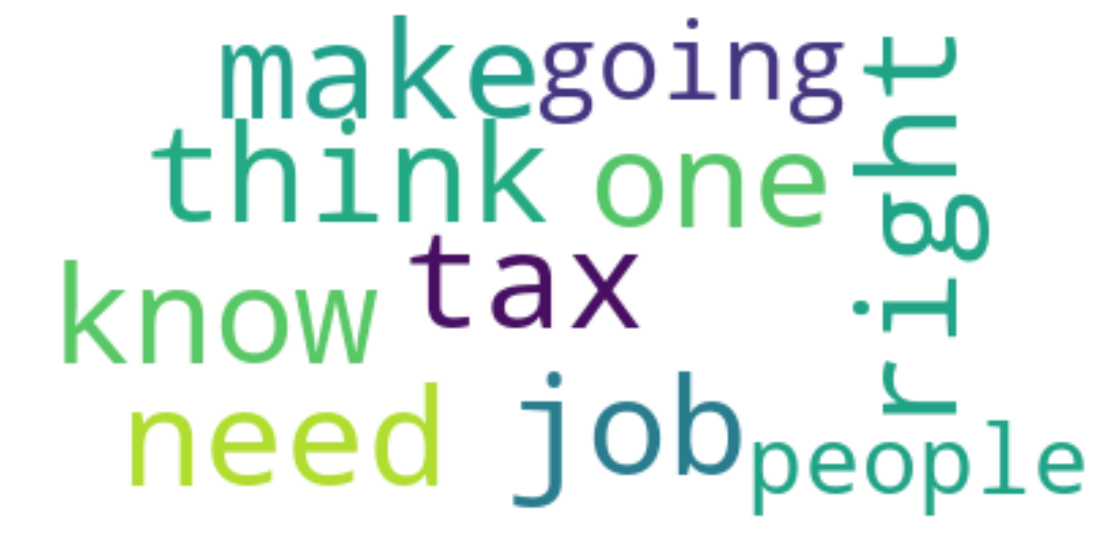

In [47]:
wordcloud = WordCloud(max_font_size=50, max_words=15, background_color="white").generate(topic_1_text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Topic 2:

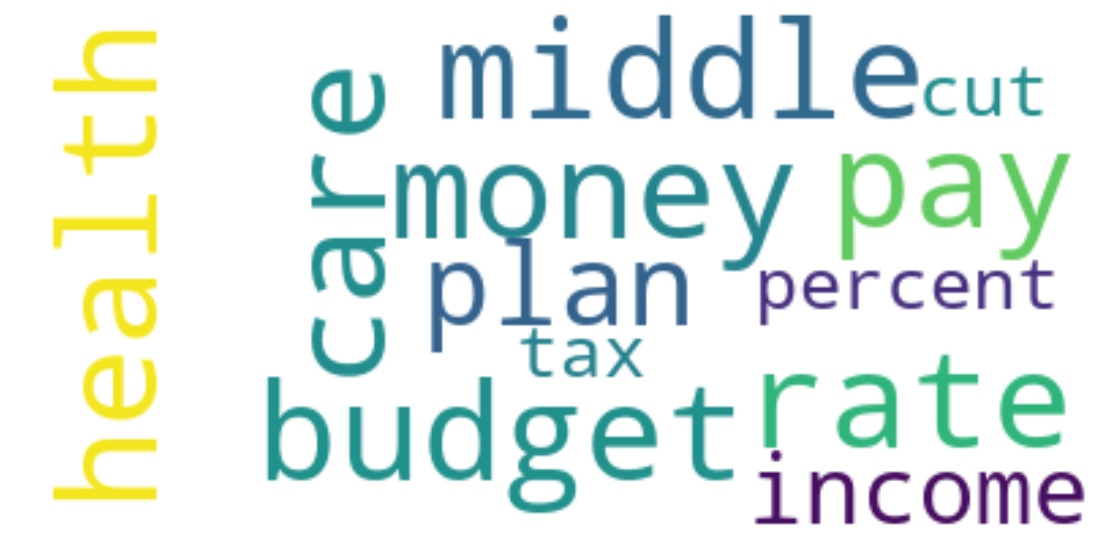

In [48]:
wordcloud = WordCloud(max_font_size=50, max_words=15, background_color="white").generate(topic_2_text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Topic 3:

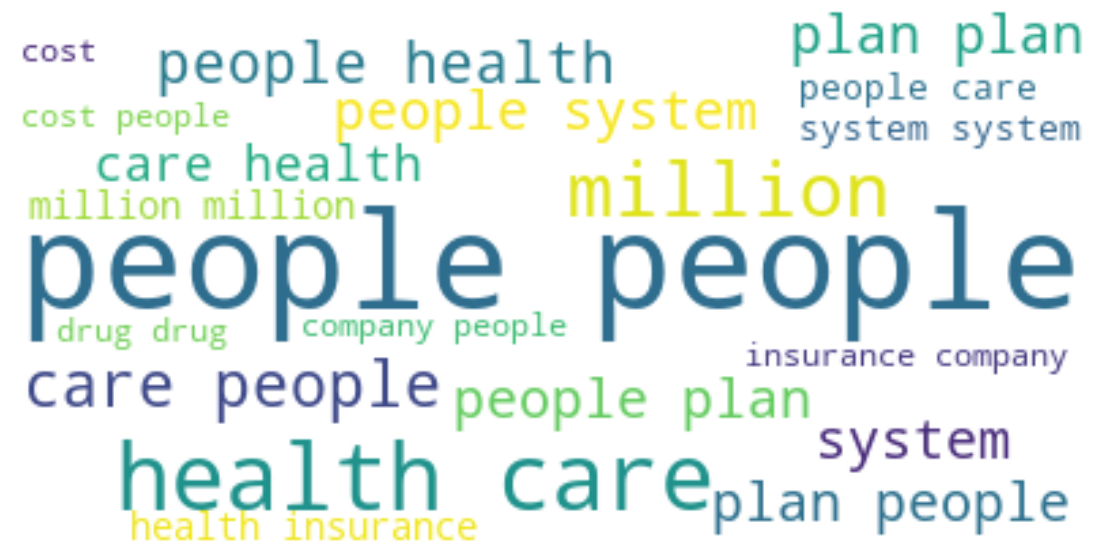

In [21]:
wordcloud = WordCloud(max_font_size=50, max_words=20, background_color="white").generate(topic_3_text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Topic 4:

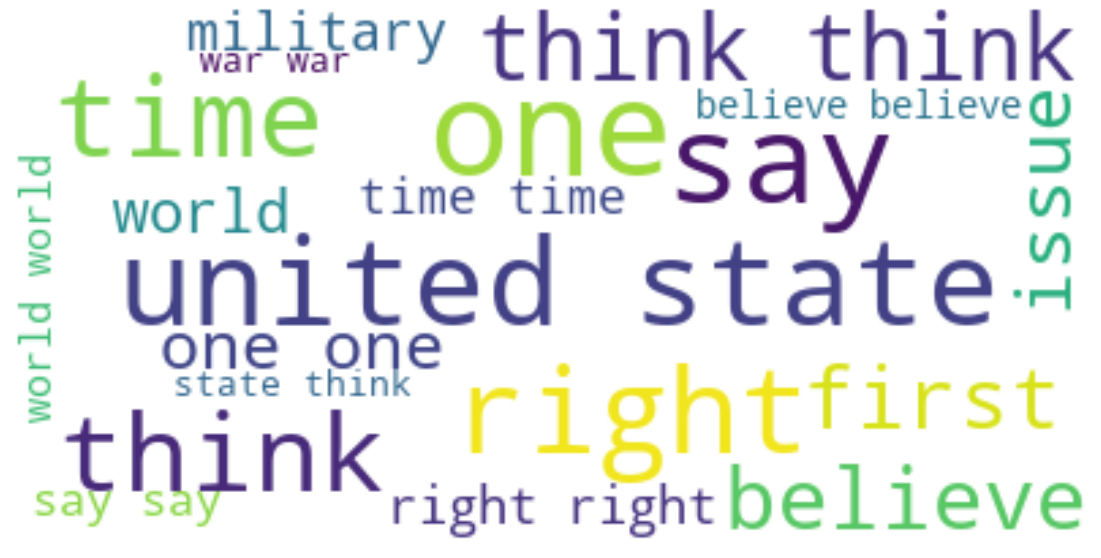

In [22]:
wordcloud = WordCloud(max_font_size=50, max_words=20, background_color="white").generate(topic_4_text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Topic 5:

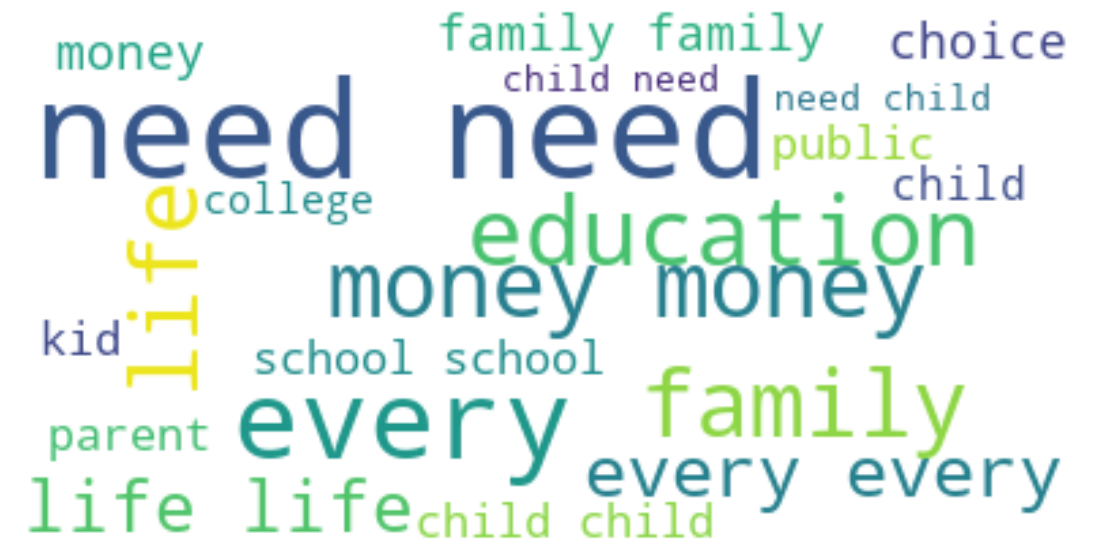

In [23]:
wordcloud = WordCloud(max_font_size=50, max_words=20, background_color="white").generate(topic_5_text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Pulling the document-topic matrix:

In [24]:
tf_doc_topic

array([[0.        , 0.        , 0.00168181, 0.04728047, 0.00153231],
       [0.05971818, 0.00125762, 0.00183021, 0.0094704 , 0.        ],
       [0.03336602, 0.02154295, 0.        , 0.01066079, 0.        ],
       ...,
       [0.05325303, 0.00314861, 0.00473133, 0.        , 0.        ],
       [0.02055706, 0.        , 0.00380714, 0.02289864, 0.        ],
       [0.        , 0.03070732, 0.        , 0.0455981 , 0.        ]])

In [25]:
tf_doc_topic[0][2]

0.0016818076563243562

Mapping these out onto the individual documents;

In [26]:
topic_df = new_df[new_df.line_length >= 40].copy()

In [27]:
topic_df['Topic_1'] = 0
topic_df['Topic_2'] = 0
topic_df['Topic_3'] = 0
topic_df['Topic_4'] = 0
topic_df['Topic_5'] = 0

In [28]:
for i, text in enumerate(topic_df.string):
    topic_df.iloc[i, 10] = tf_doc_topic[i][0]
    topic_df.iloc[i, 11] = tf_doc_topic[i][1]
    topic_df.iloc[i, 12] = tf_doc_topic[i][2]
    topic_df.iloc[i, 13] = tf_doc_topic[i][3]
    topic_df.iloc[i, 14] = tf_doc_topic[i][4]

In [29]:
topic_df.head()

,Debate_Name,Transcript,Speaker,Data_Source,Debate_Type,Year,Speaker_Type,line_length,Election_Result,string,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5
0,The First Clinton-Bush-Perot Presidential Deb...,"LEHRER: Good evening, and welcome to the first...",lehrer,Commission for Presidential Debates,General-President,1992,Moderator/Other,100,n/a,good evening welcome first debate among major ...,0.000000,0.000000,0.001682,0.047280,0.001532
1,The First Clinton-Bush-Perot Presidential Deb...,PEROT: I think the principal that separates me...,perot,Commission for Presidential Debates,General-President,1992,Independent,74,Loser,think principal separate half million people c...,0.059718,0.001258,0.001830,0.009470,0.000000
3,The First Clinton-Bush-Perot Presidential Deb...,CLINTON: The most important distinction in thi...,clinton,Commission for Presidential Debates,General-President,1992,Democrat,45,Winner,important distinction campaign represent real ...,0.033366,0.021543,0.000000,0.010661,0.000000
5,The First Clinton-Bush-Perot Presidential Deb...,"PRESIDENT BUSH: Well, I think one thing that d...",president bush,Commission for Presidential Debates,General-President,1992,Republican,81,Loser,well think one thing distinguishes experience ...,0.044839,0.000000,0.000000,0.039315,0.004124
7,The First Clinton-Bush-Perot Presidential Deb...,"CLINTON: I believe experience counts, but it’s...",clinton,Commission for Presidential Debates,General-President,1992,Democrat,167,Winner,believe experience count ’ everything value ju...,0.071210,0.015025,0.016477,0.016913,0.014779


### EDA Using Topics:

Based on topic modelling above, here are the 5 topics (based on the top words):
1. War/Foreign Policy
2. Economy/Taxes
3. Healthcare
4. Education
5. Random Bucket - Campaign Speech

In [49]:
topics = ['Random_Campaign_Speak','Economy/Taxes', 'Healthcare', 'War-Foreign_Policy', 'Education']

In [50]:
types = ['Democrat', 'Republican', 'Moderator/Other'] 

In [51]:
topics_over_time = topic_df.groupby([topic_df.Year, topic_df.Speaker_Type]).agg({'Topic_1':'mean','Topic_2':'mean', 'Topic_3':'mean', 'Topic_4':'mean', 'Topic_5':'mean'}).reset_index()

In [52]:
topics_over_time.head()

,Year,Speaker_Type,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5
0,1960,Democrat,0.024564,0.006526,0.004601,0.021208,0.012728
1,1960,Moderator/Other,0.016752,0.005335,0.004554,0.020974,0.004859
2,1960,Republican,0.021925,0.007255,0.005670,0.021246,0.012088
3,1976,Democrat,0.015022,0.021817,0.004047,0.037994,0.008356
4,1976,Moderator/Other,0.011821,0.024840,0.006173,0.034644,0.009434


In [53]:
topics_over_time.shape

(53, 7)

Topics Concentration, by Speaker Type:

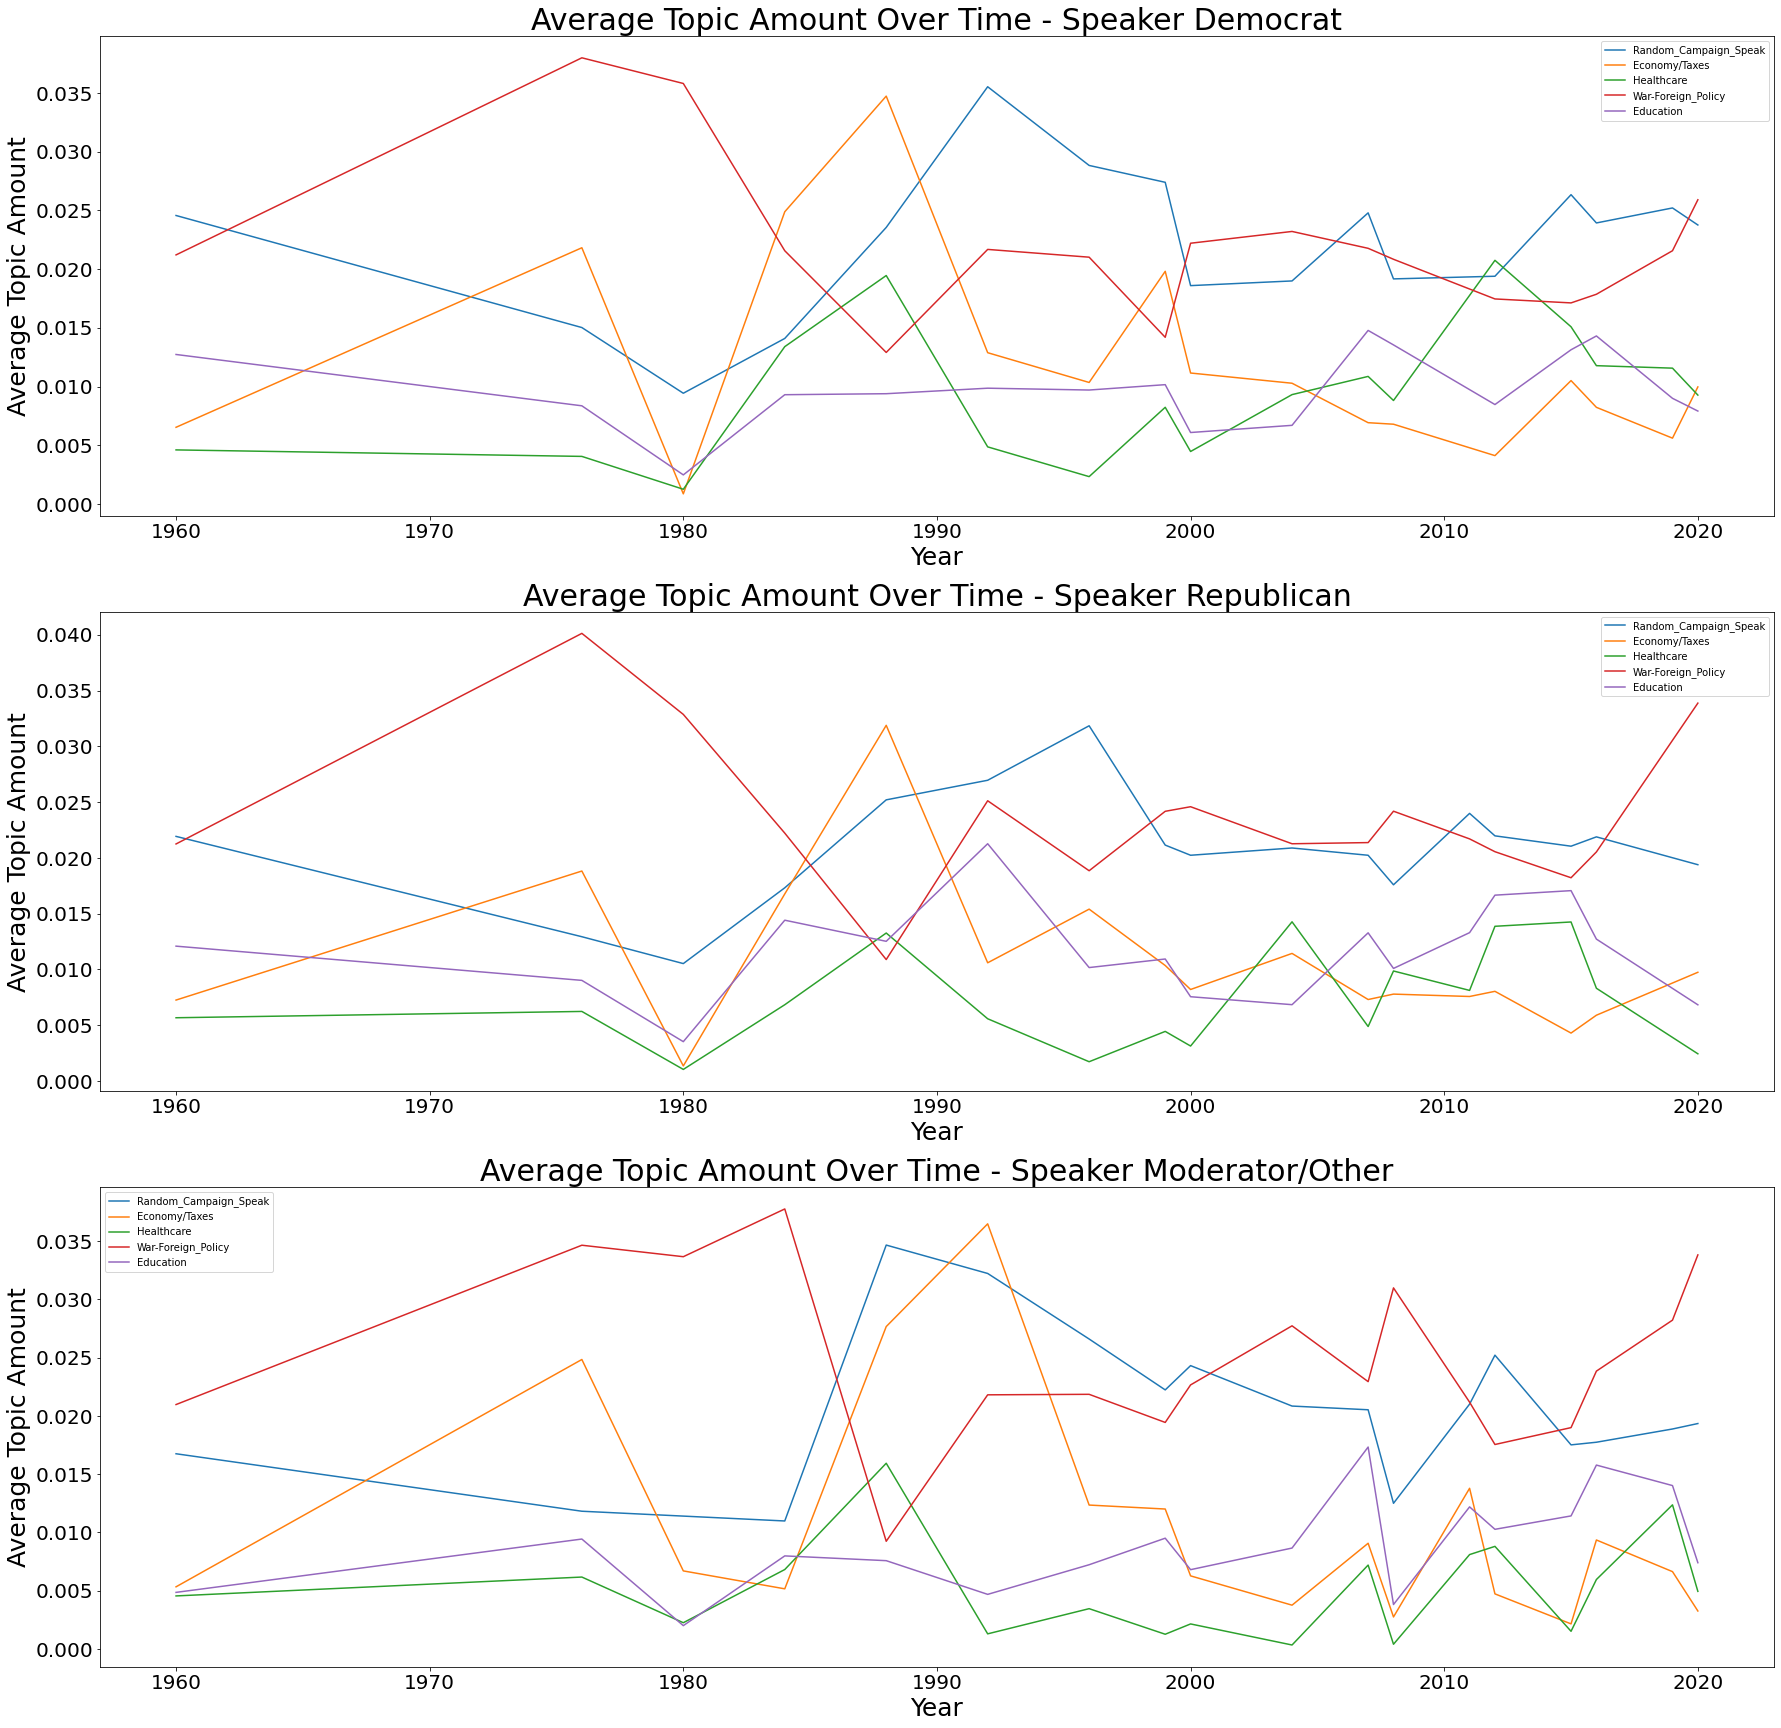

In [54]:
legend = []
plt.subplots(3, 1,figsize=(30,30))
for i, speaker_type in enumerate(types, 1):
    plt.subplot(3,1,i)
    counter = 2
    for topic in topics:
        legend.append(topic)
        x = topics_over_time[topics_over_time.iloc[:, 1] == speaker_type].iloc[:, 0]
        y = topics_over_time[topics_over_time.iloc[:, 1] == speaker_type].iloc[:, counter]
        legend.append(topic)
        plt.plot(x,y)
        counter += 1
    plt.xlabel('Year', size=25)
    plt.ylabel('Average Topic Amount', size=25)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.title('Average Topic Amount Over Time - Speaker {}'.format(speaker_type), size=30)
    plt.legend(('Random_Campaign_Speak','Economy/Taxes', 'Healthcare', 'War-Foreign_Policy', 'Education'))

Topic Concentration, by Election Result (i.e. Winner/Loser)

### Topic Modelling via LDA:

In [36]:
from sklearn.decomposition import LatentDirichletAllocation as LDA

In [37]:
lda_model = LDA(n_components = 5)

In [38]:
lda_doc_topic = lda_model.fit_transform(tf_term_document_matrix)
lda_doc_topic.shape

(10278, 5)

Pulling the top 10 words for each of the k topics:

In [39]:
lda_words = vectorizer.get_feature_names()
lda = lda_model.components_.argsort(axis=1)[:,-12:]
lda_topic_words = [[lda_words[e] for e in l] for l in lda]
for i, words in enumerate(lda_topic_words, 1):
    print('Topic {}:'.format(i))
    print(words)
    print('\n')

Topic 1:
['job', 'right', 'need', 'make', 'know', 'one', 'get', 'would', 'tax', 'think', 'going', 'people']


Topic 2:
['ally', 'force', 'united', 'troop', 'military', 'world', 'weapon', 'would', 'iraq', 'nuclear', 'war', 'iran']


Topic 3:
['brain', 'crook', 'martin', 'conception', 'life', 'endowed', 'happiness', 'religious', 'catholic', 'church', 'unborn', 'religion']


Topic 4:
['weapon', 'correspondent', 'shooting', 'fannie', 'second', 'handgun', 'assault', 'mac', 'news', 'freddie', 'question', 'gun']


Topic 5:
['humane', 'goer', 'firsthand', 'sticker', 'diploma', 'el', 'stolen', 'spain', 'fence', 'magnet', 'paso', 'verify']




These topics definitely make less sense as of now compared to NMF.

### Topic Modelling via LSA:

For LSA, using TruncatedSVD:

In [40]:
from sklearn.decomposition import TruncatedSVD

In [41]:
lsa = TruncatedSVD(5)
doc_topic = lsa.fit_transform(tf_term_document_matrix)
lsa.explained_variance_ratio_

array([0.00260417, 0.00647483, 0.00516387, 0.00381094, 0.00353404])

Pulling the top 10 words for each of the k topics:

In [42]:
tf_words = vectorizer.get_feature_names()
tf = lsa.components_.argsort(axis=1)[:,-12:]
tf_topic_words = [[tf_words[e] for e in l] for l in tf]
for i, words in enumerate(tf_topic_words, 1):
    print('Topic {}:'.format(i))
    print(words)
    print('\n')

Topic 1:
['job', 'right', 'need', 'know', 'make', 'one', 'get', 'would', 'think', 'tax', 'going', 'people']


Topic 2:
['care', 'budget', 'money', 'middle', 'health', 'rate', 'pay', 'plan', 'income', 'percent', 'cut', 'tax']


Topic 3:
['universal', 'affordable', 'company', 'child', 'people', 'system', 'medicare', 'plan', 'cost', 'insurance', 'care', 'health']


Topic 4:
['teacher', 'make', 'economy', 'college', 'work', 'kid', 'people', 'child', 'education', 'going', 'job', 'school']


Topic 5:
['kid', 'life', 'public', 'think', 'parent', 'law', 'gun', 'teacher', 'education', 'child', 'would', 'school']




In [43]:
doc_topic

array([[ 0.1166417 , -0.05417552, -0.03115563, -0.03554667,  0.03936856],
       [ 0.20342831, -0.03163917,  0.00464956,  0.04985368, -0.00463577],
       [ 0.14826574,  0.02347884, -0.03501671,  0.02642198, -0.02126945],
       ...,
       [ 0.15670858,  0.0115171 ,  0.01867788,  0.08250377, -0.08210055],
       [ 0.11990933, -0.03777566, -0.0048001 , -0.0014695 ,  0.01095368],
       [ 0.12749675,  0.03196073, -0.07035212, -0.11508245,  0.08207598]])